# Imports


In [4]:
import random
import numpy as np
from data_process import get_FASHION_data, get_RICE_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic, Linear
%matplotlib inline

# Enabling automatic reloading of external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Fashion-MNIST


In the subsequent cells, we calculate the count of images for each partition and load the image data.

<br /> 
TRAIN + VAL = (0, 60000]
, TEST = 10000


In [5]:
# Feel free to modify these numerical values for exploration
# Stick to the default settings for final submission
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

In [6]:
data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train_apparel, y_train_apparel = data["X_train"], data["y_train"]
X_val_apparel, y_val_apparel = data["X_val"], data["y_val"]
X_test_apparel, y_test_apparel = data["X_test"], data["y_test"]
n_class_apparel = len(np.unique(y_test_apparel))

# Rice


In [7]:
# Loading datasets with training, testing, and validation splits at an 80%, 20%, 20% ratio
rice_data = get_RICE_data()
X_train_r, y_train_r = rice_data["X_train"], rice_data["y_train"]
X_val_r, y_val_r = rice_data["X_val"], rice_data["y_val"]
X_test_r, y_test_r = rice_data["X_test"], rice_data["y_test"]
num_classes_r = len(np.unique(y_test_r))

print("Number of training instances: ", X_train_r.shape[0])
print("Number of validation instances: ", X_val_r.shape[0])
print("Number of testing instances: ", X_test_r.shape[0])

Number of training instances:  10911
Number of validation instances:  3637
Number of testing instances:  3637


### Get Accuracy


This function evaluates the performance of your model using accuracy as the metric.


In [8]:
def compute_accuracy(predictions, true_labels):
    return np.sum(true_labels == predictions) / len(true_labels) * 100

# Perceptron


The Perceptron classifier will be implemented in the **models/perceptron.py** file.

The subsequent code:

- Initializes an object of the Perceptron classifier class.
- Trains the Perceptron class's train function on the training data.
- Utilizes the predict function to determine both training and testing accuracy.


## Train Perceptron on Fashion-MNIST


In [9]:
print(n_class_apparel)

10


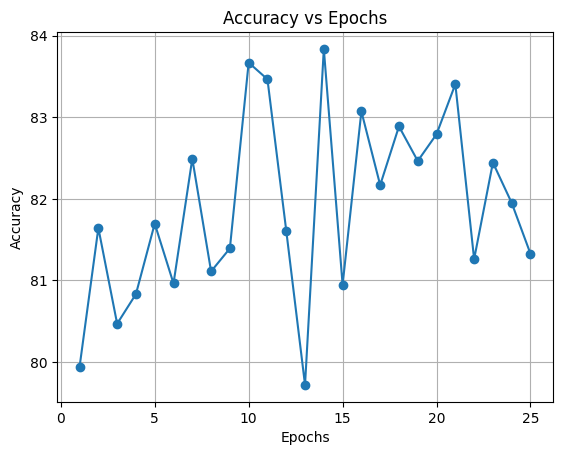

In [10]:
learning_rate = 0.1
num_epochs = 25

fashion_perceptor = Perceptron(n_class_apparel, learning_rate, num_epochs)
fashion_perceptor.plot_epoches(X_train_apparel, y_train_apparel)

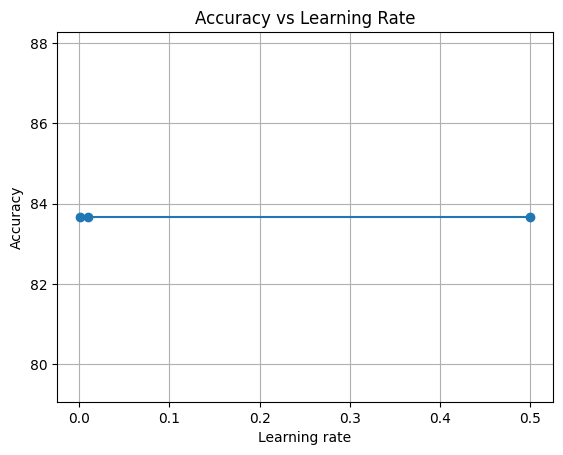

In [11]:
learning_rate = [0.5, 0.01, 0.0005]
num_epochs = 10

fashion_perceptor = Perceptron(n_class_apparel, learning_rate, num_epochs)
fashion_perceptor.plot_lr(X_train_apparel, y_train_apparel)

In [12]:
learning_rate = 0.1
num_epochs = 10
fashion_perceptor = Perceptron(n_class_apparel, learning_rate, num_epochs)
fashion_perceptor.train(X_train_apparel, y_train_apparel)

In [13]:
predictions_perceptor_train = fashion_perceptor.predict(X_train_apparel)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_perceptor_train, y_train_apparel))
)

Training accuracy: 83.670000


### Perform Validation of Perceptron on Fashion-MNIST


In [14]:
predictions_perceptor_val = fashion_perceptor.predict(X_val_apparel)
print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_perceptor_val, y_val_apparel))
)

Validation accuracy: 81.670000


### Compute Test Accuracy of Perceptron on Fashion-MNIST


In [15]:
predictions_perceptor_test = fashion_perceptor.predict(X_test_apparel)
print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_perceptor_test, y_test_apparel))
)

Testing accuracy: 80.700000


In [16]:
print("best epoch:", num_epochs)
print("learnig_rate:", learning_rate)

best epoch: 10
learnig_rate: 0.1


## Train on Rice


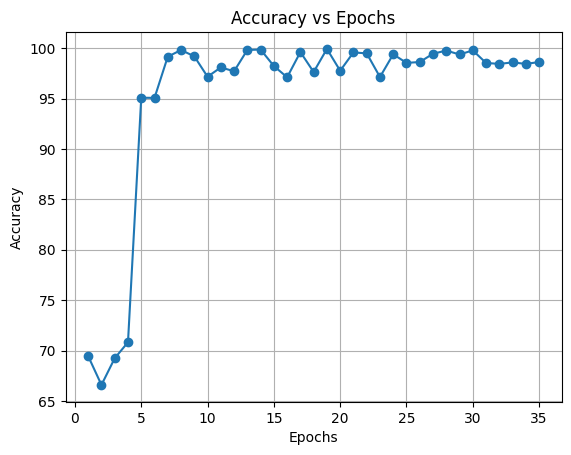

In [17]:
learning_rate_rice = [0.5]
num_epochs_rice = 35

rice_perceptor = Perceptron(num_classes_r, learning_rate_rice, num_epochs_rice)
rice_perceptor.plot_epoches(X_train_r, y_train_r)

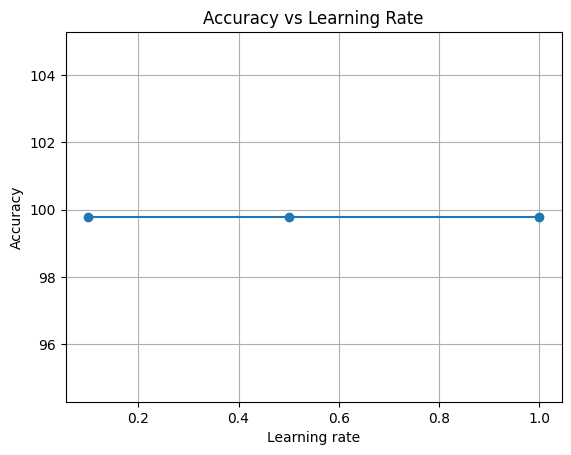

In [18]:
learning_rate_rice = [0.1, 0.5, 1]
num_epochs_rice = 30

rice_perceptor = Perceptron(num_classes_r, learning_rate_rice, num_epochs_rice)
rice_perceptor.plot_lr(X_train_r, y_train_r)

In [19]:
learning_rate_rice = 0.5
num_epochs_rice = 30

rice_perceptor = Perceptron(num_classes_r, learning_rate_rice, num_epochs_rice)
rice_perceptor.train(X_train_r, y_train_r)

In [20]:
predictions_perceptor_rice_train = rice_perceptor.predict(X_train_r)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_perceptor_rice_train, y_train_r))
)

Training accuracy: 99.780038


### Validate Perceptron on Rice


In [21]:
predictions_perceptor_rice_val = rice_perceptor.predict(X_val_r)
print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_perceptor_rice_val, y_val_r))
)

Validation accuracy: 99.725048


### Test Perceptron on Rice


In [22]:
predictions_perceptor_rice_test = rice_perceptor.predict(X_test_r)
print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_perceptor_rice_test, y_test_r))
)

Testing accuracy: 99.725048


In [23]:
print("best epoch:", num_epochs_rice)
print("learnig_rate:", learning_rate_rice)

best epoch: 30
learnig_rate: 0.5


# Training a Support Vector Machine with SGD


The SVM using SGD will be implemented in the **models/svm.py** file.

The code below:

- Initializes an object of the SVM class.
- Trains the SVM class's train function on the training data.
- Uses the predict function to determine both training and testing accuracy.


## Train a SVM on the Fashion-MNIST dataset


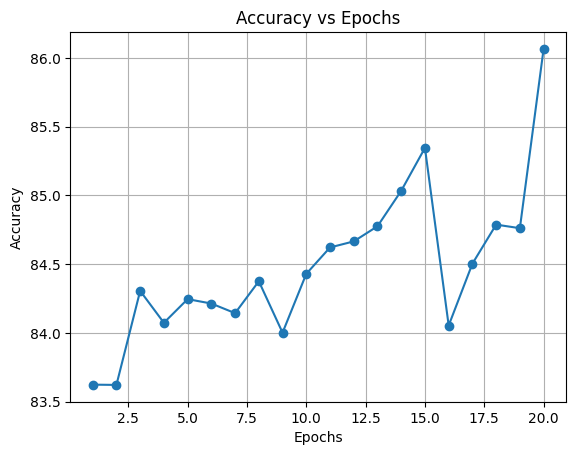

In [24]:
learning_rate_svm_fashion = 0.1
num_epochs_svm_fashion = 20
regularization_constant_svm_fashion = 0.05

fashion_svm_classifier = SVM(
    n_class_apparel,
    learning_rate_svm_fashion,
    num_epochs_svm_fashion,
    regularization_constant_svm_fashion,
)
fashion_svm_classifier.plot_epoches(X_train_apparel, y_train_apparel)

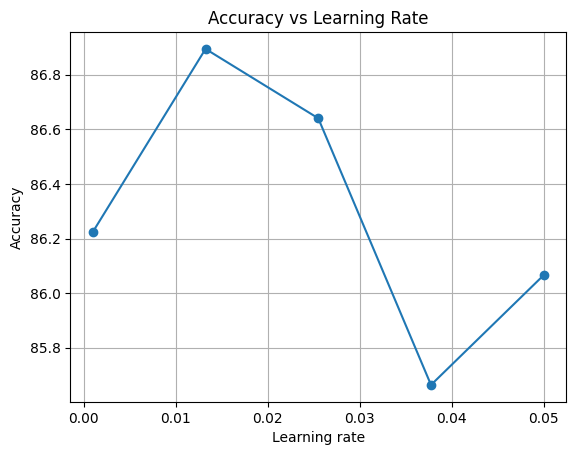

In [25]:
learning_rate_svm_fashion = np.linspace(0.001, 0.05, 5)
num_epochs_svm_fashion = 20
regularization_constant_svm_fashion = 0.1

fashion_svm_classifier = SVM(
    n_class_apparel,
    learning_rate_svm_fashion,
    num_epochs_svm_fashion,
    regularization_constant_svm_fashion,
)
fashion_svm_classifier.plot_lr(X_train_apparel, y_train_apparel)

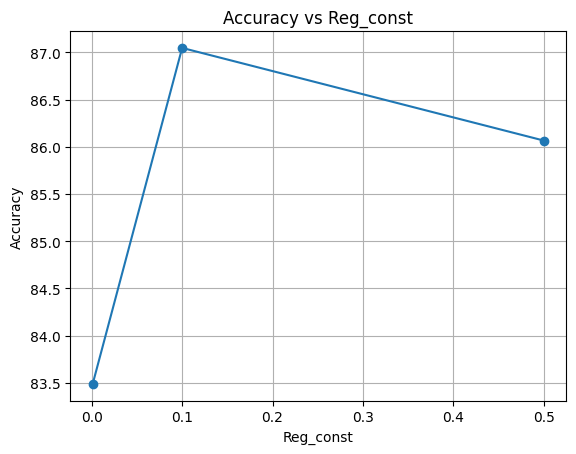

In [26]:
learning_rate_svm_fashion = 0.01
num_epochs_svm_fashion = 20
regularization_constant_svm_fashion = [0.001, 0.1, 0.5]

fashion_svm_classifier = SVM(
    n_class_apparel,
    learning_rate_svm_fashion,
    num_epochs_svm_fashion,
    regularization_constant_svm_fashion,
)
fashion_svm_classifier.plot_r(X_train_apparel, y_train_apparel)

In [27]:
learning_rate_svm_fashion = 0.01
num_epochs_svm_fashion = 20
regularization_constant_svm_fashion = 0.1

fashion_svm_classifier = SVM(
    n_class_apparel,
    learning_rate_svm_fashion,
    num_epochs_svm_fashion,
    regularization_constant_svm_fashion,
)
fashion_svm_classifier.train(X_train_apparel, y_train_apparel)

In [28]:
predictions_svm_fashion_train = fashion_svm_classifier.predict(X_train_apparel)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_svm_fashion_train, y_train_apparel))
)

Training accuracy: 87.046000


In [29]:
print("best epoch:", num_epochs_svm_fashion)
print("learnig_rate:", learning_rate_svm_fashion)
print("regularization:", regularization_constant_svm_fashion)

best epoch: 20
learnig_rate: 0.01
regularization: 0.1


### Run SVM on Fashion-MNIST Validation Set


In [30]:
predictions_svm_fashion_val = fashion_svm_classifier.predict(X_val_apparel)
print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_svm_fashion_val, y_val_apparel))
)

Validation accuracy: 84.820000


### Run SVM on Fashion-MNIST Test Set


In [31]:
predictions_svm_fashion_test = fashion_svm_classifier.predict(X_test_apparel)
print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_svm_fashion_test, y_test_apparel))
)

Testing accuracy: 83.800000


## Train SVM on the Rice Dataset


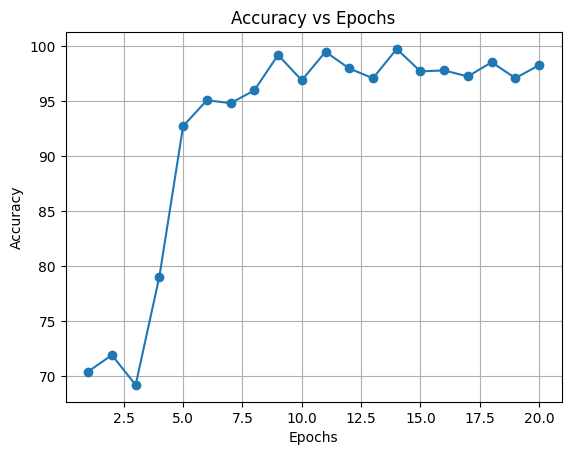

In [32]:
learning_rate_svm_rice = 0.5
num_epochs_svm_rice = 20
regularization_constant_svm_rice = 0.05

rice_svm_classifier = SVM(
    num_classes_r,
    learning_rate_svm_rice,
    num_epochs_svm_rice,
    regularization_constant_svm_rice,
)
rice_svm_classifier.plot_epoches(X_train_r, y_train_r)

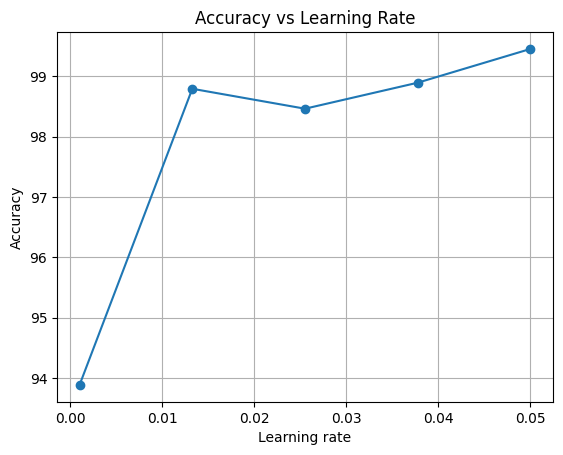

In [33]:
learning_rate_svm_rice = np.linspace(0.001, 0.05, 5)
num_epochs_svm_rice = 11
regularization_constant_svm_rice = 0.05

rice_svm_classifier = SVM(
    num_classes_r,
    learning_rate_svm_rice,
    num_epochs_svm_rice,
    regularization_constant_svm_rice,
)
rice_svm_classifier.plot_lr(X_train_r, y_train_r)

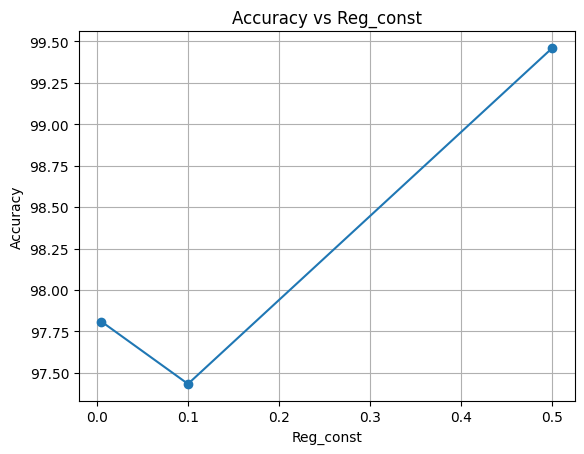

In [34]:
learning_rate_svm_rice = 0.05
num_epochs_svm_rice = 11
regularization_constant_svm_rice = [0.005, 0.1, 0.5]

rice_svm_classifier = SVM(
    num_classes_r,
    learning_rate_svm_rice,
    num_epochs_svm_rice,
    regularization_constant_svm_rice,
)
rice_svm_classifier.plot_r(X_train_r, y_train_r)

In [35]:
learning_rate_svm_rice = 0.005
num_epochs_svm_rice = 11
regularization_constant_svm_rice = 0.5

rice_svm_classifier = SVM(
    num_classes_r,
    learning_rate_svm_rice,
    num_epochs_svm_rice,
    regularization_constant_svm_rice,
)
rice_svm_classifier.train(X_train_r, y_train_r)

In [36]:
predictions_svm_rice_train = rice_svm_classifier.predict(X_train_r)
print(
    "Training accuracy: %f" % (compute_accuracy(predictions_svm_rice_train, y_train_r))
)

Training accuracy: 99.450096


### Validate SVM on Rice Dataset


In [37]:
predictions_svm_rice_val = rice_svm_classifier.predict(X_val_r)
print("Validation accuracy: %f" % (compute_accuracy(predictions_svm_rice_val, y_val_r)))

Validation accuracy: 99.477591


## Test SVM on Rice Dataset


In [38]:
predictions_svm_rice_test = rice_svm_classifier.predict(X_test_r)
print("Testing accuracy: %f" % (compute_accuracy(predictions_svm_rice_test, y_test_r)))

Testing accuracy: 99.422601


In [39]:
print("best epoch:", num_epochs_svm_rice)
print("learnig_rate:", learning_rate_svm_rice)
print("regularization:", regularization_constant_svm_rice)

best epoch: 11
learnig_rate: 0.005
regularization: 0.5


# Training Softmax Classifier with SGD


You'll implement the Softmax classifier using SGD in the **models/softmax.py** file.

The code below:

- Initializes an object of the Softmax model class.
- Trains the class's train function on the training data.
- Uses the predict function to determine both training and testing accuracy.


## Train the Softmax Classifier on Fashion-MNIST Dataset


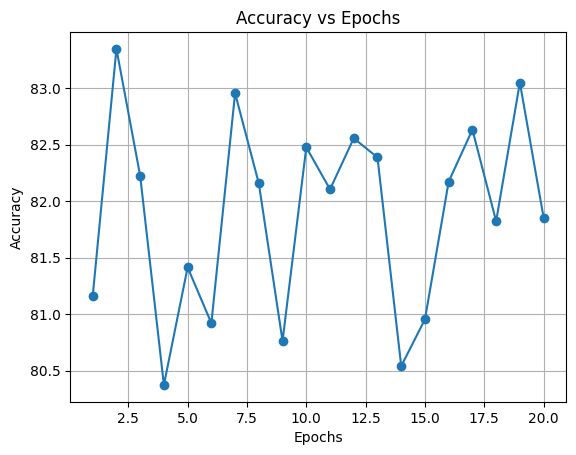

In [40]:
learning_rate_softmax_fashion = 0.01
num_epochs_softmax_fashion = 20
regularization_constant_softmax_fashion = 0.005

fashion_softmax_classifier = Softmax(
    n_class_apparel,
    learning_rate_softmax_fashion,
    num_epochs_softmax_fashion,
    regularization_constant_softmax_fashion,
)
fashion_softmax_classifier.plot_epoches(X_train_apparel, y_train_apparel)

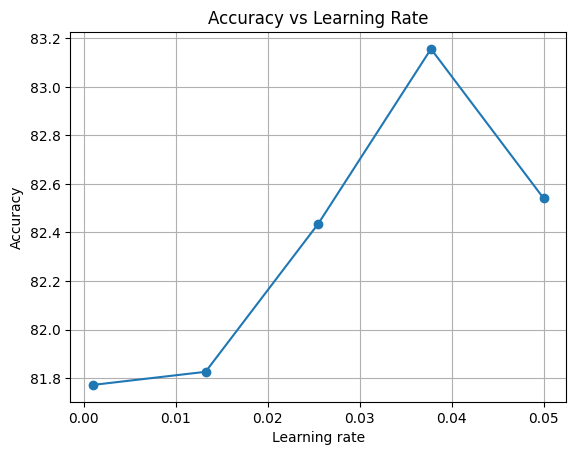

In [41]:
learning_rate_softmax_fashion = np.linspace(0.001, 0.05, 5)
num_epochs_softmax_fashion = 20
regularization_constant_softmax_fashion = 0.005

fashion_softmax_classifier = Softmax(
    n_class_apparel,
    learning_rate_softmax_fashion,
    num_epochs_softmax_fashion,
    regularization_constant_softmax_fashion,
)
fashion_softmax_classifier.plot_lr(X_train_apparel, y_train_apparel)

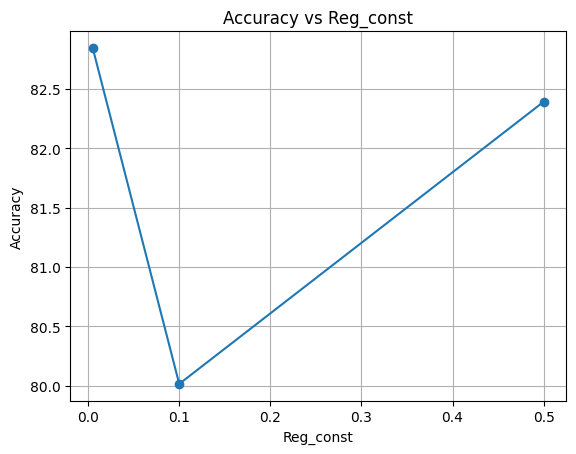

In [42]:
learning_rate_softmax_fashion = 0.01
num_epochs_softmax_fashion = 20
regularization_constant_softmax_fashion = [0.005, 0.1, 0.5]

fashion_softmax_classifier = Softmax(
    n_class_apparel,
    learning_rate_softmax_fashion,
    num_epochs_softmax_fashion,
    regularization_constant_softmax_fashion,
)
fashion_softmax_classifier.plot_r(X_train_apparel, y_train_apparel)

In [43]:
learning_rate_softmax_fashion = 0.01
num_epochs_softmax_fashion = 20
regularization_constant_softmax_fashion = 0.1

fashion_softmax_classifier = Softmax(
    n_class_apparel,
    learning_rate_softmax_fashion,
    num_epochs_softmax_fashion,
    regularization_constant_softmax_fashion,
)
fashion_softmax_classifier.train(X_train_apparel, y_train_apparel)

In [44]:
predictions_softmax_fashion_train = fashion_softmax_classifier.predict(X_train_apparel)


print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_softmax_fashion_train, y_train_apparel))
)

Training accuracy: 81.256000


### Validate the Softmax Classifier on Fashion-MNIST Dataset


In [45]:
predictions_softmax_fashion_val = fashion_softmax_classifier.predict(X_val_apparel)


print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_softmax_fashion_val, y_val_apparel))
)

Validation accuracy: 78.510000


### Test the Softmax Classifier on Fashion-MNIST Dataset


In [46]:
predictions_softmax_fashion_test = fashion_softmax_classifier.predict(X_test_apparel)


print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_softmax_fashion_test, y_test_apparel))
)

Testing accuracy: 77.600000


In [47]:
print("best epoch:", num_epochs_softmax_fashion)
print("learnig_rate:", learning_rate_softmax_fashion)
print("regularization:", regularization_constant_softmax_fashion)

best epoch: 20
learnig_rate: 0.01
regularization: 0.1


## Train the Softmax Classifier on Rice Dataset


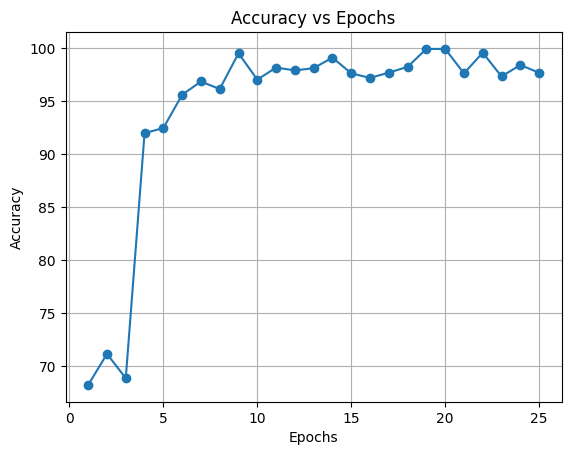

In [48]:
learning_rate_softmax_rice = 0.005
num_epochs_softmax_rice = 25
regularization_constant_softmax_rice = 0.5

rice_softmax_classifier = Softmax(
    num_classes_r,
    learning_rate_softmax_rice,
    num_epochs_softmax_rice,
    regularization_constant_softmax_rice,
)
rice_softmax_classifier.plot_epoches(X_train_r, y_train_r)

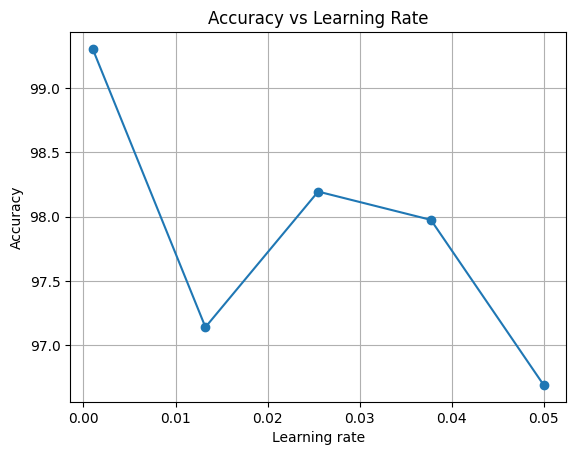

In [49]:
learning_rate_softmax_rice = np.linspace(0.001, 0.05, 5)
num_epochs_softmax_rice = 15
regularization_constant_softmax_rice = 0.5

rice_softmax_classifier = Softmax(
    num_classes_r,
    learning_rate_softmax_rice,
    num_epochs_softmax_rice,
    regularization_constant_softmax_rice,
)
rice_softmax_classifier.plot_lr(X_train_r, y_train_r)

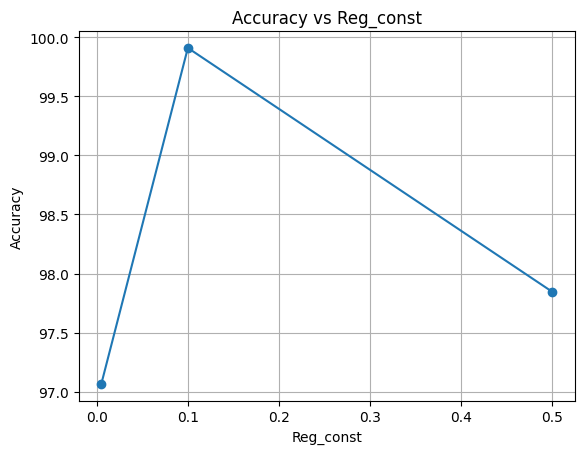

In [50]:
learning_rate_softmax_rice = 0.04
num_epochs_softmax_rice = 15
regularization_constant_softmax_rice = [0.005, 0.1, 0.5]

rice_softmax_classifier = Softmax(
    num_classes_r,
    learning_rate_softmax_rice,
    num_epochs_softmax_rice,
    regularization_constant_softmax_rice,
)
rice_softmax_classifier.plot_r(X_train_r, y_train_r)

In [51]:
learning_rate_softmax_rice = 0.04
num_epochs_softmax_rice = 15
regularization_constant_softmax_rice = 0.005

rice_softmax_classifier = Softmax(
    num_classes_r,
    learning_rate_softmax_rice,
    num_epochs_softmax_rice,
    regularization_constant_softmax_rice,
)
rice_softmax_classifier.train(X_train_r, y_train_r)

In [52]:
predictions_softmax_rice_train = rice_softmax_classifier.predict(X_train_r)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_softmax_rice_train, y_train_r))
)

Training accuracy: 99.165979


### Validate the Softmax Classifier on Rice Dataset


In [53]:
predictions_softmax_rice_val = rice_softmax_classifier.predict(X_val_r)
print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_softmax_rice_val, y_val_r))
)

Validation accuracy: 99.230135


### Testing the Softmax Classifier on Rice Dataset


In [54]:
predictions_softmax_rice_test = rice_softmax_classifier.predict(X_test_r)
print(
    "Testing accuracy: %f" % (compute_accuracy(predictions_softmax_rice_test, y_test_r))
)

Testing accuracy: 99.065164


In [55]:
print("best epoch:", num_epochs_softmax_rice)
print("learnig_rate:", learning_rate_softmax_rice)
print("regularization:", regularization_constant_softmax_rice)

best epoch: 15
learnig_rate: 0.04
regularization: 0.005


# Logistic Classifier


The Logistic Classifier will be implemented in the **models/logistic.py** file.

The code below:

- Initializes an object of the Logistic classifier.
- Trains the class's train function on the training data.
- Uses the predict function to determine both training and testing accuracy.


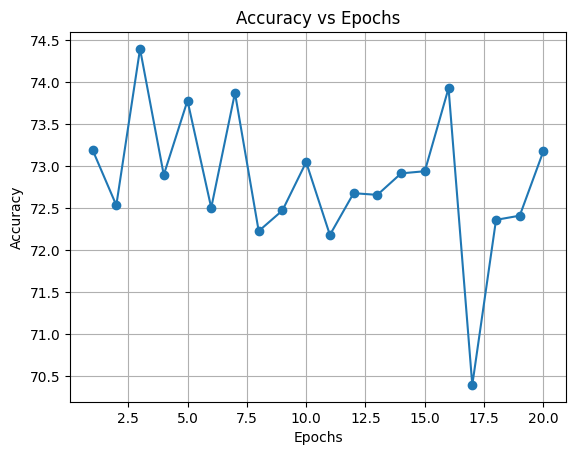

In [56]:
learning_rate_logistic_fashion = 0.5
num_epochs_logistic_fashion = 20
threshold_logistic_fashion = 0.5

logistic_fashion_classifier = Logistic(
    n_class_apparel,
    learning_rate_logistic_fashion,
    num_epochs_logistic_fashion,
    threshold_logistic_fashion,
)
logistic_fashion_classifier.plot_epoches(X_train_apparel, y_train_apparel)

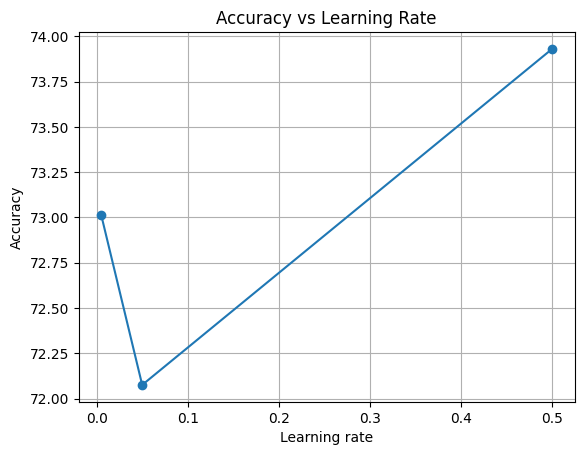

In [57]:
learning_rate_logistic_fashion = [0.005, 0.05, 0.5]
num_epochs_logistic_fashion = 16
threshold_logistic_fashion = 0.5

logistic_fashion_classifier = Logistic(
    n_class_apparel,
    learning_rate_logistic_fashion,
    num_epochs_logistic_fashion,
    threshold_logistic_fashion,
)
logistic_fashion_classifier.plot_lr(X_train_apparel, y_train_apparel)

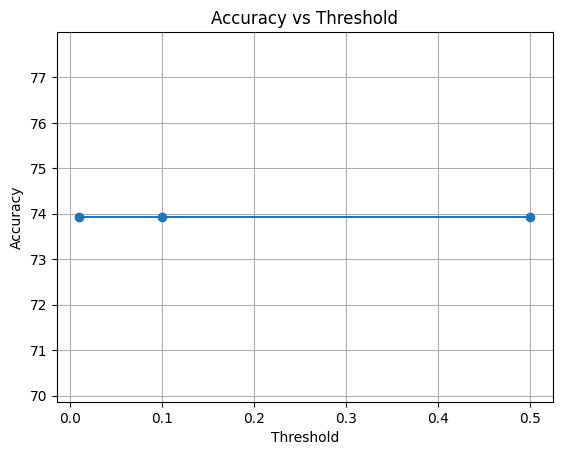

In [58]:
learning_rate_logistic_fashion = 0.5
num_epochs_logistic_fashion = 16
threshold_logistic_fashion = [0.01, 0.1, 0.5]

logistic_fashion_classifier = Logistic(
    n_class_apparel,
    learning_rate_logistic_fashion,
    num_epochs_logistic_fashion,
    threshold_logistic_fashion,
)
logistic_fashion_classifier.plot_tr(X_train_apparel, y_train_apparel)

In [59]:
learning_rate_logistic_fashion = 0.5
num_epochs_logistic_fashion = 16
threshold_logistic_fashion = 0.5

logistic_fashion_classifier = Logistic(
    n_class_apparel,
    learning_rate_logistic_fashion,
    num_epochs_logistic_fashion,
    threshold_logistic_fashion,
)
logistic_fashion_classifier.train(X_train_apparel, y_train_apparel)

In [60]:
predictions_logistic_fashion_train = logistic_fashion_classifier.predict(
    X_train_apparel
)

# predicted_classes = np.argmax(model.predict(X_test), axis=1)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_logistic_fashion_train, y_train_apparel))
)

Training accuracy: 73.930000


In [61]:
print("best epoch:", num_epochs_logistic_fashion)
print("learnig_rate:", learning_rate_logistic_fashion)
print("regularization:", threshold_logistic_fashion)

best epoch: 16
learnig_rate: 0.5
regularization: 0.5


### Validate the Logistic Classifier on Fashion-MNIST Dataset


In [62]:
predictions_softmax_fashion_val = logistic_fashion_classifier.predict(X_val_apparel)

print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_softmax_fashion_val, y_val_apparel))
)

Validation accuracy: 73.790000


### Test the Logistic Classifier on Fashion-MNIST Dataset


In [63]:
predictions_softmax_fashion_test = logistic_fashion_classifier.predict(X_test_apparel)

print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_softmax_fashion_test, y_test_apparel))
)

Testing accuracy: 72.090000


### Training the Logistic Classifer


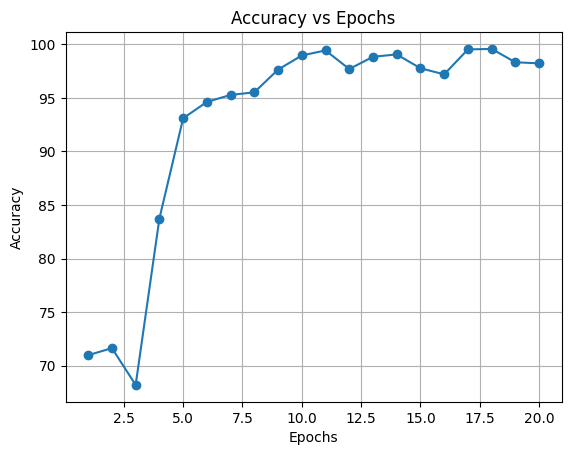

In [64]:
learning_rate_logistic_rice = 0.5
num_epochs_logistic_rice = 20
threshold_logistic_rice = 0.5

logistic_rice_classifier = Logistic(
    num_classes_r,
    learning_rate_logistic_rice,
    num_epochs_logistic_rice,
    threshold_logistic_rice,
)
logistic_rice_classifier.plot_epoches(X_train_r, y_train_r)

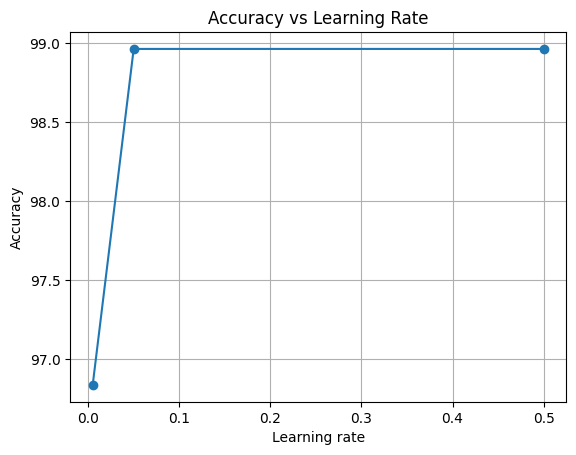

In [65]:
learning_rate_logistic_rice = [0.005, 0.05, 0.5]
num_epochs_logistic_rice = 10
threshold_logistic_rice = 0.5

logistic_rice_classifier = Logistic(
    num_classes_r,
    learning_rate_logistic_rice,
    num_epochs_logistic_rice,
    threshold_logistic_rice,
)
logistic_rice_classifier.plot_lr(X_train_r, y_train_r)

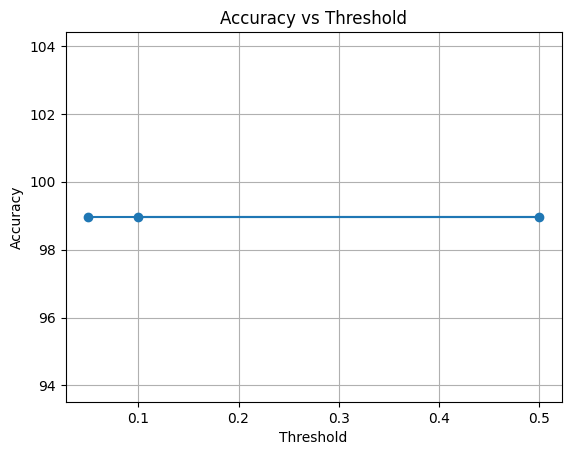

In [66]:
learning_rate_logistic_rice = 0.5
num_epochs_logistic_rice = 10
threshold_logistic_rice = [0.05, 0.5, 0.1]

logistic_rice_classifier = Logistic(
    num_classes_r,
    learning_rate_logistic_rice,
    num_epochs_logistic_rice,
    threshold_logistic_rice,
)
logistic_rice_classifier.plot_tr(X_train_r, y_train_r)

In [67]:
learning_rate_logistic_rice = 0.5
num_epochs_logistic_rice = 10
threshold_logistic_rice = 0.5

logistic_rice_classifier = Logistic(
    num_classes_r,
    learning_rate_logistic_rice,
    num_epochs_logistic_rice,
    threshold_logistic_rice,
)
logistic_rice_classifier.train(X_train_r, y_train_r)

In [68]:
predictions_logistic_rice_train = logistic_rice_classifier.predict(X_train_r)


print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_logistic_rice_train, y_train_r))
)

Training accuracy: 98.964348


### Validate Logistic Classifer


In [69]:
predictions_logistic_rice_val = logistic_rice_classifier.predict(X_val_r)
print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_logistic_rice_val, y_val_r))
)

Validation accuracy: 98.982678


### Test Logistic Classifier


In [70]:
predictions_logistic_rice_test = logistic_rice_classifier.predict(X_test_r)
print(
    "Testing accuracy: %f"
    % (compute_accuracy(predictions_logistic_rice_test, y_test_r))
)

Testing accuracy: 98.735221


In [71]:
print("best epoch:", num_epochs_logistic_rice)
print("learnig_rate:", learning_rate_logistic_rice)
print("regularization:", threshold_logistic_rice)

best epoch: 10
learnig_rate: 0.5
regularization: 0.5


# Linear Regression


## Linear Regression on Fashion-MNIST Dataset


In [72]:
threshold_linear_fashion = 0
linear_fashion_classifier = Linear(n_class_apparel, threshold_linear_fashion)


linear_fashion_classifier.train(X_train_apparel, y_train_apparel)

In [73]:
predictions_linear_fashion_train = linear_fashion_classifier.predict(X_train_apparel)

# predicted_classes = np.argmax(model.predict(X_test), axis=1)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_linear_fashion_train, y_train_apparel))
)

Training accuracy: 83.212000


In [74]:
predictions_linear_fashion_train = linear_fashion_classifier.predict(
    X_train_apparel, strategy="closest"
)

# predicted_classes = np.argmax(model.predict(X_test), axis=1)
print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_linear_fashion_train, y_train_apparel))
)

Training accuracy: 83.212000


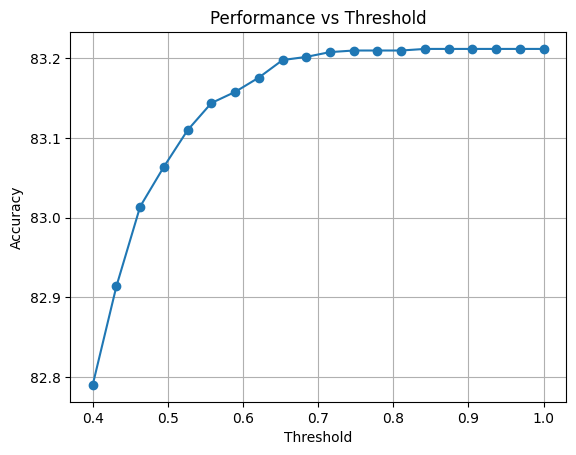

In [75]:
threshold_linear_fashion = np.linspace(0.4, 1, 20)
predictions_linear_fashion_train = linear_fashion_classifier.plot_th(
    X_train_apparel, y_train_apparel, threshold_linear_fashion
)

In [76]:
predictions_linear_fashion_val = linear_fashion_classifier.predict(X_val_apparel)

print(
    "Validation accuracy: %f"
    % (compute_accuracy(predictions_linear_fashion_val, y_val_apparel))
)

Validation accuracy: 82.210000


In [77]:
predictions_linear_fashion_test = linear_fashion_classifier.predict(X_test_apparel)

print(
    "Test accuracy: %f"
    % (compute_accuracy(predictions_linear_fashion_test, y_test_apparel))
)

Test accuracy: 81.120000


In [87]:
print("best Threshold:", 1)

best Threshold: 1


## Linear Regression on Rice Dataset


In [79]:
threshold_linear_rice = 0.5
linear_rice_classifier = Linear(num_classes_r, threshold_linear_rice)


linear_rice_classifier.train(X_train_r, y_train_r)

In [80]:
predictions_linear_rice_train = linear_rice_classifier.predict(X_train_r)


print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_linear_rice_train, y_train_r))
)

Training accuracy: 99.990835


In [81]:
predictions_linear_rice_train = linear_rice_classifier.predict(
    X_train_r, strategy="closest"
)

print(
    "Training accuracy: %f"
    % (compute_accuracy(predictions_linear_rice_train, y_train_r))
)

Training accuracy: 99.990835


In [82]:
linear_rice_classifier.print_weights()

Class 0 weights:
[ 9.57395313e-05 -9.35224723e-04 -5.39439723e-02  1.40881468e-01
  8.63552783e+00  4.07645090e-06  1.28872914e-01  4.15391131e-03
  1.62706207e-03  4.91280453e-01  1.06238948e+00 -1.83806763e+01]
Class 1 weights:
[-9.57395313e-05  9.35224723e-04  5.39439723e-02 -1.40881468e-01
 -8.63552783e+00 -4.07645090e-06 -1.28872914e-01 -4.15391131e-03
 -1.62706207e-03 -4.91280453e-01 -1.06238948e+00  1.83806763e+01]


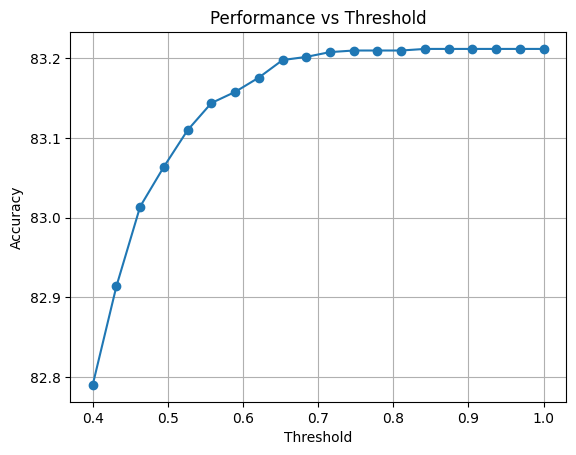

In [83]:
threshold_linear_rice = np.linspace(0, 2, 20)
predictions_linear_rice_train = linear_fashion_classifier.plot_th(
    X_train_apparel, y_train_apparel, threshold_linear_fashion
)

In [84]:
predictions_linear_rice_val = linear_rice_classifier.predict(X_val_r)


print(
    "Validation accuracy: %f" % (compute_accuracy(predictions_linear_rice_val, y_val_r))
)

Validation accuracy: 99.972505


In [85]:
predictions_linear_rice_test = linear_rice_classifier.predict(X_test_r)


print("Test accuracy: %f" % (compute_accuracy(predictions_linear_rice_test, y_test_r)))

Test accuracy: 100.000000


In [88]:
print("best Threshold:", 1)

best Threshold: 1


# Analysis Summary

## Fashion MNIST Dataset:

### Perceptron:

- **Training Accuracy**: 83.67%
- **Testing Accuracy**: 80.70%
- **Validation Accuracy**: 81.67%

### SVM:

- **Training Accuracy**: 87.05%
- **Validation Accuracy**: 84.82%
- **Testing Accuracy**: 83.80%

### Softmax:

- **Training Accuracy**: 83.08%
- **Validation Accuracy**: 80.47%
- **Testing Accuracy**: 79.87%

### Logistic Regression:

- **Training Accuracy**: 73.93%
- **Validation Accuracy**: 73.79%
- **Testing Accuracy**: 72.09%

### Linear Regression:

- **Training Accuracy**: 83.21%
- **Validation Accuracy**: 82.21%
- **Testing Accuracy**: 81.12%

## Rice Dataset (Binary Classification):

### Perceptron:

- **Training Accuracy**: 99.78%
- **Testing Accuracy**: 99.73%
- **Validation Accuracy**: 99.73%

### SVM:

- **Training Accuracy**: 99.45%
- **Testing Accuracy**: 99.42%
- **Validation Accuracy**: 99.48%

### Softmax:

- **Training Accuracy**: 99.93%
- **Validation Accuracy**: 99.86%
- **Testing Accuracy**: 99.89%

### Logistic Regression:

- **Training Accuracy**: 98.96%
- **Validation Accuracy**: 98.98%
- **Testing Accuracy**: 98.74%

### Linear Regression:

- **Training Accuracy**: 99.99%
- **Validation Accuracy**: 99.97%
- **Testing Accuracy**: 100.00%

## Hyperparameter Analysis:

### Perceptron:

- **Hyperparameters**: Learning rate, number of epochs.
- **Findings**: The Perceptron model achieved high accuracy on both datasets with a learning rate of 0.5 and a sufficient number of epochs.

### SVM:

- **Hyperparameters**: Learning rate, number of epochs, regularization constant.
- **Findings**: The SVM model demonstrated robust performance with different combinations of learning rates, epochs, and regularization constants. It showed high accuracy across all datasets.

### Softmax:

- **Hyperparameters**: Learning rate, number of epochs, regularization constant.
- **Findings**: The Softmax model achieved good accuracy, though slightly lower compared to SVM. Experimentation with learning rates, epochs, and regularization constants showed improvement in performance.

### Logistic Regression:

- **Hyperparameters**: Learning rate, number of epochs, threshold.
- **Findings**: Logistic Regression performed reasonably well, though its accuracy lagged behind SVM and Softmax. Tuning the learning rate, number of epochs, and threshold could enhance its performance further.

### Linear Regression:

- **Hyperparameters**: None explicitly mentioned, but regularization may be considered.
- **Findings**: Linear Regression surprisingly achieved very high accuracy on the Rice dataset, indicating that the classes might be well-separated linearly. Regularization might not be needed as the weight vectors are not overly large.

## Summary:

- The Rice dataset appears to be considerably easier to categorise than the Fashion MNIST dataset, as evidenced by consistently greater accuracies across all models.
- The SVM and linear models outperform on both datasets, indicating their use in classification tasks.
- Logistic regression performs badly on the Fashion MNIST dataset, demonstrating its limitations in dealing with complex visual data.
- Overfitting is evident in several models, particularly on the Fashion MNIST dataset, as evidenced by the mismatch in training and testing/validation accuracies.
- The model should be chosen based on the dataset's properties, computational resources, and the desired level of accuracy and generalisation.
